# Age Estimation and Gender Classification

In this assignment, you will train CNN models to estimate a person's age and gender by given a face image. Please read carefully all the instructions before you start to write your code.

**Your tasks**

You need train two CNN models:
- one is defined by you with a few restrictions and be trained from scratch, save it as `age_gender_A.h5`
- the other is to finetune a pretrained model, save it as `age_gender_B.h5`

**Dataset**

Your models will be trained and validated on a folder `train_val/` containing 5,000 labeled face images (size: 128 x 128), originated from the UTKFace dataset. During marking, your code will be tested on unseen test data.

**Performance metric**

The metrics for measuring the performance on the test set are:
- age estimation: MAE (Mean Absolute Error)
- gender classification: accuracy

**Please use the GPU time wisely.**

Just be aware that there is some limit of free GPU usage (It is said the users can use up to 12 hours in row. But many people found they reached its limit far less than 12 hours.). Therefore, I would give you three suggestions to mimimise the risk of reaching the limit.

1. Make sure you have a stable internet connection.
2. Double check all the hyperparameters are good before you start to train the model.
3. According to my experience, each model should be trained in less than 2 hours. If much longer than that, you'd better consider adjusting the architecture.

## Setting Up: Mount the google drive
Mount your google drive to the notebook.

Also don't forget to **enable GPU** before your training.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Visualize a few photos
It is always benificial to know your data well before you start. Here display a few (at least 20) images together with its corresponding age and gender from the `train_val/` folder to have a first impression of the dataset. You may also check what the size of the images are.

In [ ]:
import os
from PIL import Image
import cv2 as cv

PROJ_DIR = '/content/drive/MyDrive/Colab Notebooks/CNN_test'
train_val = PROJ_DIR + '/data/train_val'

Total number of images in /content/drive/MyDrive/Colab Notebooks/CNN_test/data/train_val : 5000
['40_0_3_20170119183403621.jpg.chip.jpg', '75_0_0_20170117174511134.jpg.chip.jpg', '18_1_0_20170109213011914.jpg.chip.jpg', '70_1_3_20170116224931319.jpg.chip.jpg', '26_1_1_20170116232602440.jpg.chip.jpg', '23_0_1_20170114033532450.jpg.chip.jpg', '4_0_0_20170109191251137.jpg.chip.jpg', '1_1_4_20161221192615380.jpg.chip.jpg', '28_0_2_20170107212142294.jpg.chip.jpg', '72_1_0_20170110182012800.jpg.chip.jpg', '26_1_1_20170113011732808.jpg.chip.jpg', '34_0_1_20170113135659457.jpg.chip.jpg', '25_0_0_20170117195027938.jpg.chip.jpg', '3_1_4_20170103205816397.jpg.chip.jpg', '54_0_3_20170119210214520.jpg.chip.jpg', '45_0_3_20170119201303715.jpg.chip.jpg', '13_0_2_20170103201143159.jpg.chip.jpg', '24_1_3_20170104222753607.jpg.chip.jpg', '4_0_0_20170110213211374.jpg.chip.jpg', '56_1_0_20170110122842545.jpg.chip.jpg', '27_0_1_20170117010749619.jpg.chip.jpg', '37_1_3_20170119202521964.jpg.chip.jpg', '8_0_

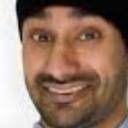

/content/drive/MyDrive/Colab Notebooks/CNN_test/data/train_val/75_0_0_20170117174511134.jpg.chip.jpg


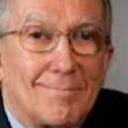

/content/drive/MyDrive/Colab Notebooks/CNN_test/data/train_val/18_1_0_20170109213011914.jpg.chip.jpg


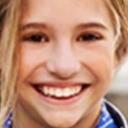

/content/drive/MyDrive/Colab Notebooks/CNN_test/data/train_val/70_1_3_20170116224931319.jpg.chip.jpg


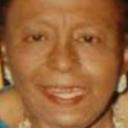

/content/drive/MyDrive/Colab Notebooks/CNN_test/data/train_val/26_1_1_20170116232602440.jpg.chip.jpg


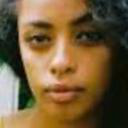

/content/drive/MyDrive/Colab Notebooks/CNN_test/data/train_val/23_0_1_20170114033532450.jpg.chip.jpg


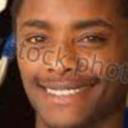

/content/drive/MyDrive/Colab Notebooks/CNN_test/data/train_val/4_0_0_20170109191251137.jpg.chip.jpg


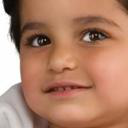

/content/drive/MyDrive/Colab Notebooks/CNN_test/data/train_val/1_1_4_20161221192615380.jpg.chip.jpg


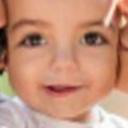

In [ ]:

# #display images from a directory function
def display_multiple_images(directory, n):
    #create an image list from the directory
    image_list = os.listdir(directory)
    print("Total number of images in", directory, ":", len(image_list))
    print(image_list)

    for x in range(n):
        img = image_list[x]
        img_location = str(str(directory)+"/"+str(img))
        print(img_location)
        display(Image.open(img_location))

display_multiple_images(train_val, 8)


Filename: /content/drive/MyDrive/Colab Notebooks/CNN_test/data/train_val/75_0_0_20170117174511134.jpg.chip.jpg


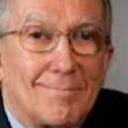

Age: 75
Gender: Male
Image type is: <class 'numpy.ndarray'>
Image shape is: (128, 128, 3)
_____________________________
Total number of images in /content/drive/MyDrive/Colab Notebooks/CNN_test/data/train_val : 5000


In [ ]:
#functions to display the images and other tasks

def get_image_details(directory, n):
    #breakdown of directory into lists
    image_paths = []
    age_labels = []
    gender_labels = []
    #find age and gender values from the directory
    for filename in os.listdir(directory):
        image_path = os.path.join(directory, filename)
        temp = filename.split('_')
        age = int(temp[0])
        gender = int(temp[1])
        #populate the lists with the information
        image_paths.append(image_path)
        age_labels.append(age)
        gender_labels.append(gender)
    #get the image name for display
    img_filepath = str(image_paths[n])
    print("Filename:", img_filepath)
    display(Image.open(img_filepath)) #display the image
    print("Age:", age_labels[n]) # display the age
    #convert gender integer to name
    if gender_labels[n] == 0:
      gender = "Male"
    else:
      gender = "Female"
    print("Gender:", gender) #display the gender
    #read the image as numpy array
    img_RGB = cv.imread(img_filepath)
    print("Image type is: " +str(type(img_RGB))) #display the image type
    shape = img_RGB.shape
    print("Image shape is:", shape) #display the image shape
    print("_____________________________")


def count_images_in_directory(directory):
    count = len([filename for filename in os.listdir(directory) if filename.endswith(".jpg")])
    print("Total number of images in",directory,":", count)

get_image_details(train_val, 1)
count_images_in_directory(train_val)

## Rearrange the dataset
You may do any arrangement for the dataset to suit your later process, such as splitting into training set and validation set, saving the gender labels and age some how, and so on.


In [ ]:
import pandas as pd

#create a dataframe from a directory
def convert_to_dataframe(directory):
    image_list = os.listdir(directory)
    number_of_images = len(image_list)
    print("Number of images to pass into dataframe:", number_of_images)
    #create a dictionary with all images and genders and ages
    image_paths = []
    age_labels = []
    gender_labels = []

    for filename in os.listdir(directory):
        image_path = os.path.join(directory, filename)
        temp = filename.split('_')
        age = int(temp[0])
        gender = int(temp[1])
        image_paths.append(image_path)
        age_labels.append(age)
        gender_labels.append(gender)

    # convert to dataframe
    new_df = pd.DataFrame()
    new_df['image'], new_df['age'], new_df['gender'] = image_paths, age_labels, gender_labels
    print("Dataframe of",directory,"created successfully.")
    # print(new_df)
    return new_df

train_val_df = convert_to_dataframe(train_val)
train_val_df


Number of images to pass into dataframe: 5000
Dataframe of /content/drive/MyDrive/Colab Notebooks/CNN_test/data/train_val created successfully.


,image,age,gender
0,/content/drive/MyDrive/Colab Notebooks/CNN_tes...,40,0
1,/content/drive/MyDrive/Colab Notebooks/CNN_tes...,75,0
2,/content/drive/MyDrive/Colab Notebooks/CNN_tes...,18,1
3,/content/drive/MyDrive/Colab Notebooks/CNN_tes...,70,1
4,/content/drive/MyDrive/Colab Notebooks/CNN_tes...,26,1
...,...,...,...
4995,/content/drive/MyDrive/Colab Notebooks/CNN_tes...,73,0
4996,/content/drive/MyDrive/Colab Notebooks/CNN_tes...,21,0
4997,/content/drive/MyDrive/Colab Notebooks/CNN_tes...,45,0
4998,/content/drive/MyDrive/Colab Notebooks/CNN_tes...,63,1


In [ ]:
import shutil
import numpy as np

#splitting train_val into three new folders for the pre-processing
#execution file is in the next block of code

#split files in a directory into three lists at 8:1:1 ratio
def split_directory(directory, ratio=[8, 1, 1]):
    list_images = os.listdir(directory)
    ratio = np.array(ratio) / np.sum(ratio) #convert the input ratio to a numpy array
    np.random.shuffle(list_images) #randomly reorder
    n_samples = len(list_images)
    n_train = int(ratio[0] * n_samples)
    n_val = int(ratio[1] * n_samples)
    return list_images[:n_train], list_images[n_train:n_train+n_val], list_images[n_train+n_val:]


#we want to move individual items from a directory into a new directory
#this functions takes the lists created from split_directory function
def change_directory(src_directory, dst_directory, list_items):
    if not os.path.exists(dst_directory): #if the path doesn't already exist
        os.makedirs(dst_directory) #create a new path with the name dst_directory
    for filename in list_items:
        src = os.path.join(src_directory, filename)
        dst = os.path.join(dst_directory, filename)
        shutil.copy2(src, dst) #copy each file from list_items from src to dst, keeping the filename
    dst_dir_size = count_images_in_directory(dst_directory) #check executed properly with below print
    print(dst_dir_size, "files from directory", src_directory, "successfully moved to", dst_directory)

#PROJ_DIR = '/content/drive/MyDrive/Colab Notebooks/CNN_test'
#dst_directories to move items into
#dst_train_dir = PROJ_DIR + '/data/split_train/'
#dst_val_dir = PROJ_DIR + '/data/split_val/'
#dst_test_dir = PROJ_DIR + '/data/split_test/'

#prechecks on source directory
count_images_in_directory(train_val)

#create three lists using the function split_directory
#to be used in change_folder function
train, val, test = split_directory(train_val)

Total number of images in /content/drive/MyDrive/Colab Notebooks/CNN_test/data/train_val : 5000


#execute folder change functions above
#only need to run when first initialising the folders

change_directory(train_val, dst_train_dir, train)
change_directory(train_val, dst_val_dir, val)
change_directory(train_val, dst_test_dir, test)

# #post folder change checks
list_images_training = os.listdir(dst_train_dir) #as a list
list_images_validation = os.listdir(dst_val_dir)
list_images_testing = os.listdir(dst_test_dir)

size_training = len(list_images_training)
size_validation = len(list_images_validation)
size_testing = len(list_images_testing)

print("Total samples training:",size_training)
print("Filename:", dst_train_dir)
print("Total samples in validation:",size_validation)
print("Filename:", dst_val_dir)
print("Total samples in testing:",size_testing)
print("Filename:", dst_test_dir)

## STEP1: Data pre-processing
Now you need do some pre-processing before feeding data into a CNN network. You may consider:

1.	Rescale the pixel values (integers between 0 and 255) to [0,1]. **You must do this rescaling.** Otherwise the testing performance will be affected significantly, as the test images will be rescaling in this way.
2.	Data augmentation. **Go straight to this step if rescaling was done before**.

**Don't rescale the age to [0,1].** Otherwise the testing performance will be affected significantly, as the original age is used in the testing stage.

In [ ]:
#STEP 1: Rescaling the images and moving them into a new folder

PROJ_DIR = '/content/drive/MyDrive/Colab Notebooks/CNN_test'
#destination filepaths that will be created and data moved to after rescaling
rescaled_train_dir = PROJ_DIR + "/data/rescaled_train_dir"
rescaled_val_dir = PROJ_DIR + "/data/rescaled_val_dir"
rescaled_test_dir = PROJ_DIR + "/data/rescaled_test_dir"

#a function to rescale images from one dir and adding them to a new dir
def rescale_images(file_list, dest_dir, data_dir):
    if not os.path.exists(dest_dir):
        os.makedirs(dest_dir) #create new dest_dir if not exists
        print("New directory", dest_dir, "created.")
    for filename in file_list:
        src_path = os.path.join(data_dir, filename) #actual filepath = dir + filename
        img = cv.imread(src_path) #load the image
        rescaled_img = img / 255.0 #rescale the image to [0,1]
        #save to new folder
        dest_path = os.path.join(dest_dir, filename) #actual filepath = dir + filename
        cv.imwrite(dest_path, rescaled_img) #save the rescaled image with destination path
    #print("Rescale of images in", src_path, "completed successfully.")
    print("Rescaled images can be found in", dest_dir)

#src dirs are from the split/change directory functions earlier (split_train, split_val, split_test)
rescale_images(train, rescaled_train_dir, train_val)
rescale_images(val, rescaled_val_dir, train_val)
rescale_images(test, rescaled_test_dir, train_val)

New directory /content/drive/MyDrive/Colab Notebooks/CNN_test/data/rescaled_train_dir created.
Rescaled images can be found in /content/drive/MyDrive/Colab Notebooks/CNN_test/data/rescaled_train_dir
New directory /content/drive/MyDrive/Colab Notebooks/CNN_test/data/rescaled_val_dir created.
Rescaled images can be found in /content/drive/MyDrive/Colab Notebooks/CNN_test/data/rescaled_val_dir
New directory /content/drive/MyDrive/Colab Notebooks/CNN_test/data/rescaled_test_dir created.
Rescaled images can be found in /content/drive/MyDrive/Colab Notebooks/CNN_test/data/rescaled_test_dir


In [ ]:
#post rescale folder checks
list_images_train = os.listdir(rescaled_train_dir) #as a list
list_images_val = os.listdir(rescaled_val_dir)
list_images_test = os.listdir(rescaled_test_dir)

size_train = len(list_images_train)
size_val = len(list_images_val)
size_test = len(list_images_test)

print("Total number of images in", rescaled_train_dir,":", size_train)
print("Total number of images in", rescaled_val_dir,":", size_val)
print("Total number of images in", rescaled_test_dir,":", size_test)


Total number of images in /content/drive/MyDrive/Colab Notebooks/CNN_test/data/rescaled_train_dir : 4000
Total number of images in /content/drive/MyDrive/Colab Notebooks/CNN_test/data/rescaled_val_dir : 500
Total number of images in /content/drive/MyDrive/Colab Notebooks/CNN_test/data/rescaled_test_dir : 500


In [ ]:
#STEP 2: Data augmentation

from keras.preprocessing.image import ImageDataGenerator

#images to be augmented are the in the rescaled directories
#need to be in dataframe format for augmentation with .flow_from_dataframe()
#create dataframes for train, val, test

rescaled_train_dir = PROJ_DIR + "/data/rescaled_train_dir"
rescaled_val_dir = PROJ_DIR + "/data/rescaled_val_dir"
rescaled_test_dir = PROJ_DIR + "/data/rescaled_test_dir"

cnn_train = convert_to_dataframe(rescaled_train_dir)
cnn_val = convert_to_dataframe(rescaled_val_dir)
cnn_test = convert_to_dataframe(rescaled_test_dir)
targets = ["gender", "age"]

#define data augmentation parameters
train_datagen = ImageDataGenerator(
        rotation_range=20,       # rotate image up to 20 degrees
        width_shift_range=0.2,   # shift image horizontally up to 20% of the width
        height_shift_range=0.2,  # shift image vertically up to 20% of the height
        shear_range=0.2,         # shear image up to 20 degrees
        zoom_range=0.2,          # zoom image up to 20%
        horizontal_flip=True,    # flip image horizontally
        fill_mode='nearest')     # fill missing pixels with nearest value


#create image generators for train, validation, and test sets
train_generator = train_datagen.flow_from_dataframe(
        dataframe = cnn_train,
        directory = rescaled_train_dir,
        x_col = "image",
        y_col = targets,
        target_size=(128, 128),  #resize images to 128x128)
        batch_size=10,
        shuffle = True,
        class_mode='multi_output',
        #class_names=targets,
        dtype='float32')

validation_generator = ImageDataGenerator().flow_from_dataframe(
        dataframe = cnn_val,
        directory = rescaled_val_dir,
        x_col = "image",
        y_col = targets,
        target_size=(128, 128),
        batch_size=10,
        shuffle = True,
        class_mode='multi_output',
        #class_names=targets,
        dtype='float32')

test_generator = ImageDataGenerator().flow_from_dataframe(
        dataframe = cnn_test,
        directory = rescaled_test_dir,
        x_col = "image",
        y_col = targets,
        #y_col none for test generator
        target_size=(128, 128),
        batch_size=100, #should be one divisible by total
        shuffle = False,
        class_mode='multi_output',
        #class_names=targets,
        dtype='float32')

num_train_images = train_generator.n
print("Number of training images:", num_train_images)


Number of images to pass into dataframe: 4000
Dataframe of /content/drive/MyDrive/Colab Notebooks/CNN_test/data/rescaled_train_dir created successfully.
Number of images to pass into dataframe: 500
Dataframe of /content/drive/MyDrive/Colab Notebooks/CNN_test/data/rescaled_val_dir created successfully.
Number of images to pass into dataframe: 500
Dataframe of /content/drive/MyDrive/Colab Notebooks/CNN_test/data/rescaled_test_dir created successfully.
Found 4000 validated image filenames.
Found 500 validated image filenames.
Found 500 validated image filenames.
Number of training images: 4000


In [ ]:
cnn_train

,image,age,gender
0,/content/drive/MyDrive/Colab Notebooks/CNN_tes...,52,1
1,/content/drive/MyDrive/Colab Notebooks/CNN_tes...,65,1
2,/content/drive/MyDrive/Colab Notebooks/CNN_tes...,35,0
3,/content/drive/MyDrive/Colab Notebooks/CNN_tes...,36,0
4,/content/drive/MyDrive/Colab Notebooks/CNN_tes...,32,1
...,...,...,...
3995,/content/drive/MyDrive/Colab Notebooks/CNN_tes...,26,1
3996,/content/drive/MyDrive/Colab Notebooks/CNN_tes...,30,0
3997,/content/drive/MyDrive/Colab Notebooks/CNN_tes...,25,1
3998,/content/drive/MyDrive/Colab Notebooks/CNN_tes...,38,1


## STEP2A: Build your own CNN network
Define your own CNN for classifying the gender and predicting the age. Though there are two tasks, you need **only one CNN model, but with two outputs** - you may search online for solution.

There are a few restrictions about your network as follows.
1.	The input size must be 128 x 128 x 3, which means you **should not resize** the original images. This is because my test code relies on this particular input size. Any other size will cause problem in the testing stage.
2.  Please treat the gender classification as a binary problem, i.e., **the output layer for the gender branch has only 1 unit**, instead of 2 (though it is correct to treat the gender classification as a mutli-class problem where class number is 2, the last layer has 2 units). This is because my test code only works for the 1-unit-last-layer gender branch setting.
3.	The size of feature maps being fed to the first fully connected layer must be less than 10 x 10, while there is no number limitation about the depth.
4.	You may choose any techniques for preventing overfitting.

In the end of the cell, use `modelA.summary()` to output the model architecture. You may also use `plot_model()` to visualize its architecture.

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 128, 128, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_4 (Conv2D)              (None, 128, 128, 32  896         ['input_3[0][0]']                
                                )                                                                 
                                                                                                  
 max_pooling2d_4 (MaxPooling2D)  (None, 64, 64, 32)  0           ['conv2d_4[0][0]']               
                                                                                            

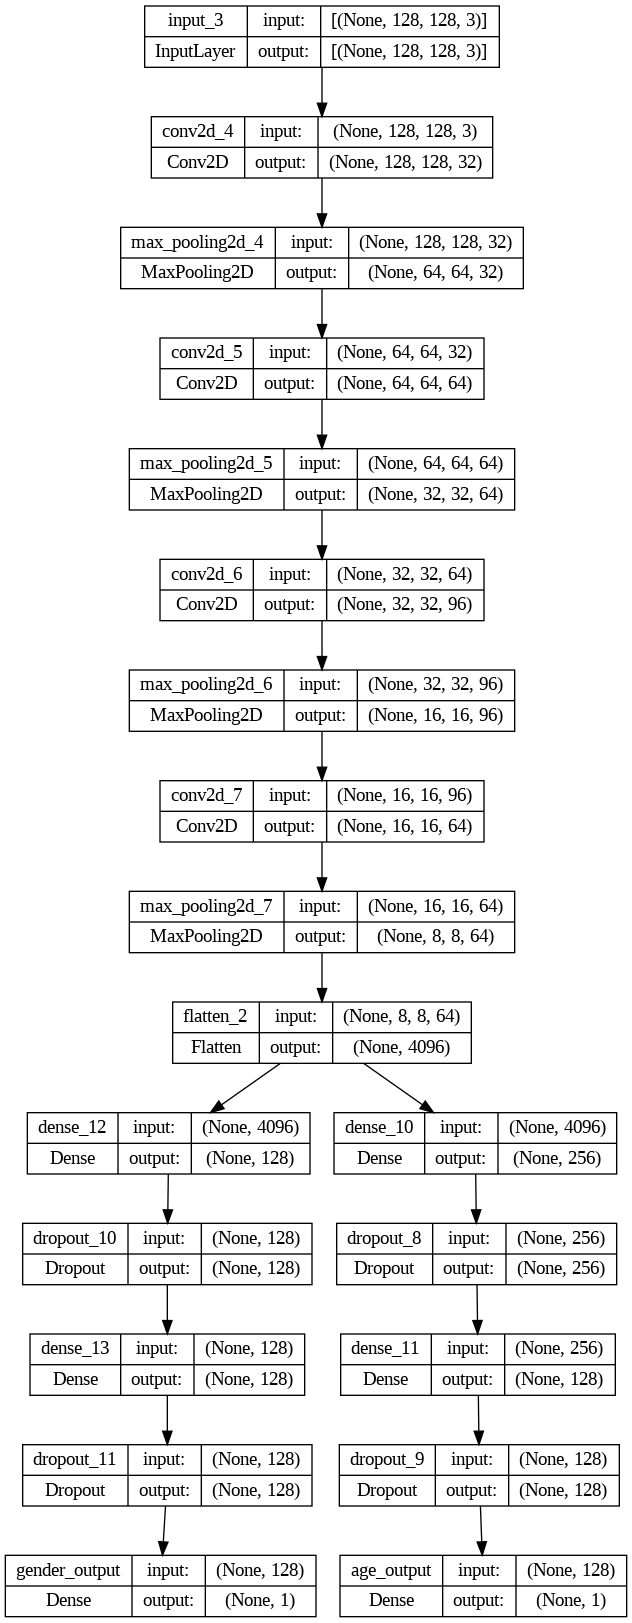

In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import plot_model

# Define input layer
input_layer = Input(shape=(128, 128, 3))

# Convolutional layers
conv1 = Conv2D(32, kernel_size=(3, 3), padding='same', activation='relu')(input_layer)
pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)
conv2 = Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same')(pool1)
pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)
conv3 = Conv2D(96, kernel_size=(3, 3), activation='relu', padding='same')(pool2)
pool3 = MaxPooling2D(pool_size=(2, 2))(conv3)
conv4 = Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same')(pool3)
pool4 = MaxPooling2D(pool_size=(2, 2))(conv4)

# Flatten layer
flatten = Flatten()(pool4)

# Age branch
age_dense1 = Dense(256, activation='relu')(flatten)
age_dropout1 = Dropout(0.3)(age_dense1)
age_dense2 = Dense(128, activation='relu')(age_dropout1)
age_dropout2 = Dropout(0.3)(age_dense2)
age_output = Dense(1, name='age_output')(age_dropout2)

# Gender branch
gender_dense1 = Dense(128, activation='relu')(flatten)
gender_dropout1 = Dropout(0.3)(gender_dense1)
gender_dense2 = Dense(128, activation='relu')(gender_dropout1)
gender_dropout2 = Dropout(0.3)(gender_dense2)
gender_output = Dense(1, activation='sigmoid', name='gender_output')(gender_dropout2)


# Define the model
modelA = Model(inputs=input_layer, outputs=[gender_output, age_output])

# Print the model summary
modelA.summary()
plot_model(modelA, show_shapes=True)


## STEP3A: Compile and train your model
Compile and train your model here.
Save your model by `modelA.save(your_model_folder+"age_gender_A.h5")` after training.

**DON'T use any other name for your model file.** This is because my test code relies on this particular model name. Any other file name will cause problem in the testing stage.

**Save the model with `save()` instead of `save_weights()`.** This is because I will load the model by

`modelA = load_model(model_folder+"age_gender_A.h5")`.


In [ ]:
# Compile the model
modelA.compile(optimizer='adam', loss={'gender_output': 'binary_crossentropy', 'age_output': 'mean_squared_error'}, metrics={'gender_output': 'accuracy', 'age_output': 'mae'})

modelA.fit(train_generator, epochs=20, validation_data=validation_generator)

# modelA.save("/content/drive/MyDrive/"+"age_gender_A.h5test1")

Epoch 1/20
400/400 [==============================] - 454s 1s/step - loss: 451.8923 - gender_output_loss: 0.7144 - age_output_loss: 451.1781 - gender_output_accuracy: 0.5102 - age_output_mae: 16.4158 - val_loss: 543.4833 - val_gender_output_loss: 0.7077 - val_age_output_loss: 542.7756 - val_gender_output_accuracy: 0.4880 - val_age_output_mae: 19.6807
Epoch 2/20
400/400 [==============================] - 212s 531ms/step - loss: 384.9653 - gender_output_loss: 0.6929 - age_output_loss: 384.2722 - gender_output_accuracy: 0.5100 - age_output_mae: 15.1045 - val_loss: 398.9208 - val_gender_output_loss: 0.6853 - val_age_output_loss: 398.2354 - val_gender_output_accuracy: 0.5280 - val_age_output_mae: 16.3877
Epoch 3/20
400/400 [==============================] - 219s 546ms/step - loss: 377.0717 - gender_output_loss: 0.6871 - age_output_loss: 376.3847 - gender_output_accuracy: 0.5497 - age_output_mae: 14.9913 - val_loss: 559.4463 - val_gender_output_loss: 0.6587 - val_age_output_loss: 558.7875 - 

## STEP4A: Draw the learning curves
Draw four figures as follows
1.	The loss of the gender classification over the training and validation set
2.	The accuracy of the gender classification over the training and validation set
3.	The loss of the age estimation over the training and validation set
4.	The MAE of the age estimation over the training and validation set


In [ ]:
import matplotlib.pyplot as plt

# Get the history of the model's training
history = modelA.history
print(history)

# Plot the gender classification loss over the training and validation set
plt.plot(history.history['gender_output_loss'])
plt.plot(history.history['val_gender_output_loss'])
plt.title('Gender Classification Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.show()

# Plot the gender classification accuracy over the training and validation set
plt.plot(history.history['gender_output_accuracy'])
plt.plot(history.history['val_gender_output_accuracy'])
plt.title('Gender Classification Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

# Plot the age estimation loss over the training and validation set
plt.plot(history.history['age_output_loss'])
plt.plot(history.history['val_age_output_loss'])
plt.title('Age Estimation Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.show()

# Plot the age estimation MAE over the training and validation set
plt.plot(history.history['age_output_mae'])
plt.plot(history.history['val_age_output_mae'])
plt.title('Age Estimation MAE')
plt.ylabel('MAE')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.show()


## STEP2B: Build a CNN network based on a pre-trained model
Choose one existing CNN architecture pre-trained on ImageNet, and fine-tune on this dataset.

The same as required in Model A, **don’t resize the input image size**. **The output layer for the gender branch is set to have only 1 unit**.

In the end of the cell, use `modelB.summary()` to output the model architecture. You may also use `plot_model()` to visualize its architecture.


58889256/58889256 [==============================] - 0s 0us/step
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 128, 128, 3  0           []                               
                                )]                                                                
                                                                                                  
 block1_conv1 (Conv2D)          (None, 128, 128, 64  1792        ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 block1_conv2 (Conv2D)          (None, 128, 128, 64  36928       ['block1_conv1[0][0]']           
                             

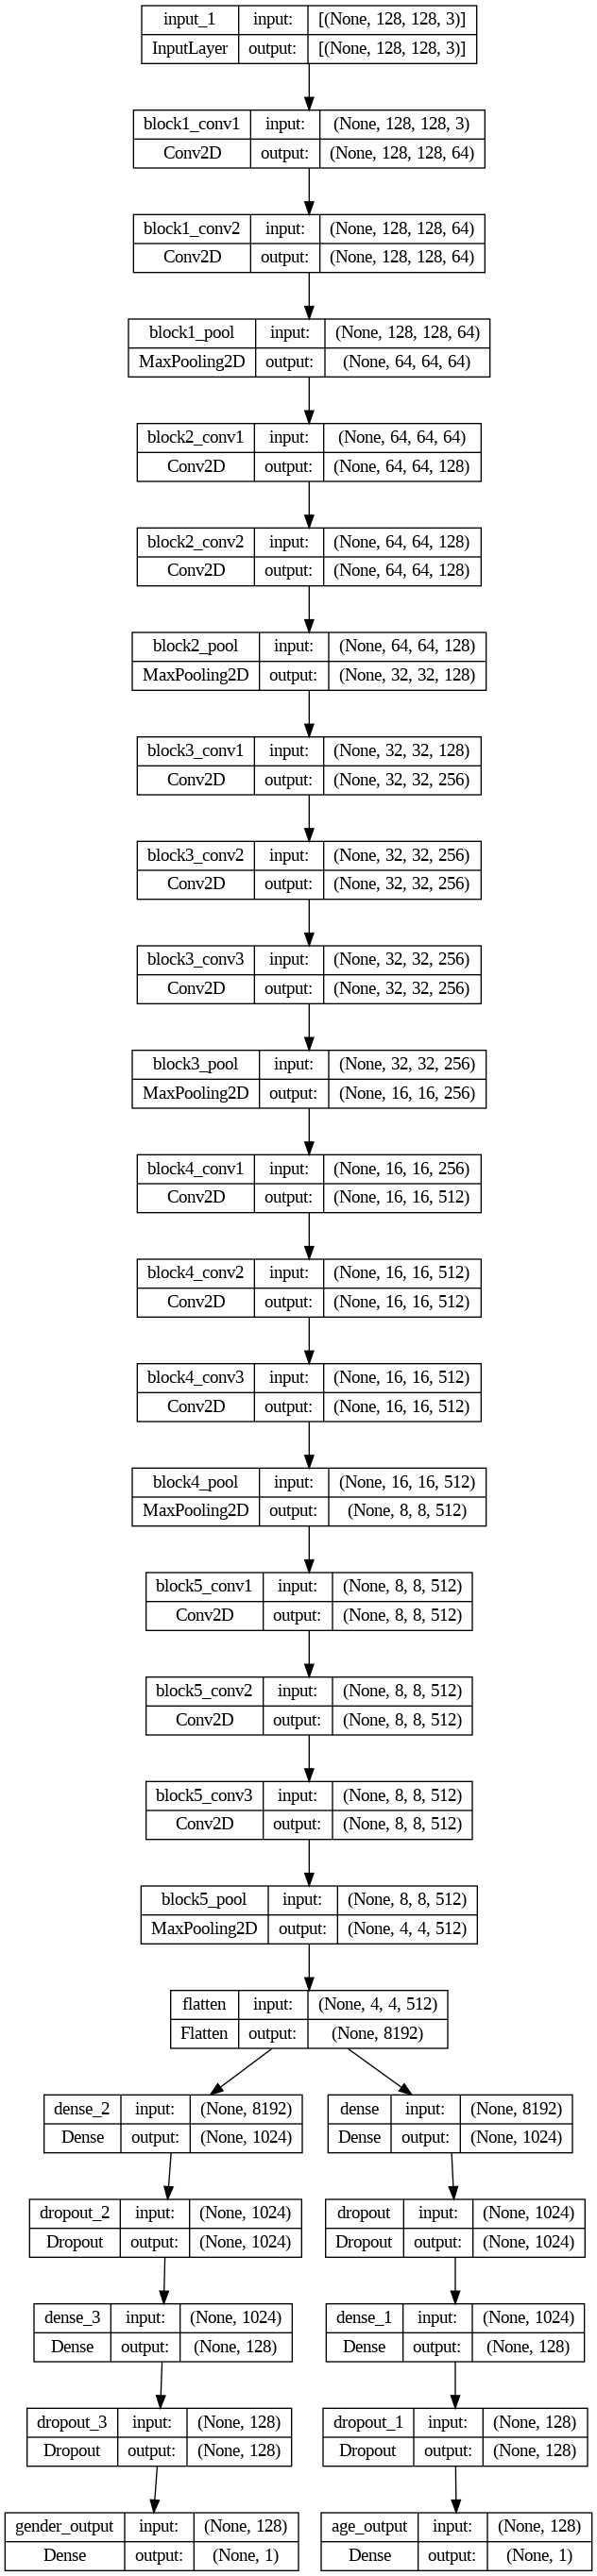

In [ ]:
from keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.utils import plot_model

from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.applications.vgg16 import VGG16
from keras.optimizers import Adam

# Define the input image size for the VGG16 model
img_width, img_height = 128, 128

# Load the pre-trained VGG16 model without the top layers
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(img_width, img_height, 3))

# Freeze the weights of the convolutional layers
for layer in base_model.layers:
    layer.trainable = False

# Add new top layers for the new classification task
#model = Sequential()
flatten = Flatten(name="flatten")(base_model.output)

# Age branch
top_model = Dense(1024, activation='relu')(flatten)
top_model = Dropout(0.3)(top_model)
top_model = Dense(128, activation='relu')(top_model)
top_model = Dropout(0.3)(top_model)
age_output2 = Dense(1, name='age_output')(top_model)

# Gender branch
top_model = Dense(1024, activation='relu')(flatten)
top_model = Dropout(0.3)(top_model)
top_model = Dense(128, activation='relu')(top_model)
top_model = Dropout(0.3)(top_model)
gender_output2 = Dense(1, activation='sigmoid', name='gender_output')(top_model)


# Define the model
modelB = Model(inputs=base_model.input, outputs=[gender_output2, age_output2])

modelB.summary()
from tensorflow.keras.utils import plot_model
plot_model(modelB, show_shapes=True)


In [ ]:
# Train the model on the new dataset
modelB.compile(optimizer='adam', loss={'gender_output': 'binary_crossentropy', 'age_output': 'mean_squared_error'}, metrics={'gender_output': 'accuracy', 'age_output': 'mae'})

modelB.fit(train_generator, epochs=20, validation_data=validation_generator)


Epoch 1/20
400/400 [==============================] - 1164s 3s/step - loss: 388.5727 - gender_output_loss: 0.7444 - age_output_loss: 387.8283 - gender_output_accuracy: 0.5727 - age_output_mae: 15.2294 - val_loss: 319.1330 - val_gender_output_loss: 0.5977 - val_age_output_loss: 318.5353 - val_gender_output_accuracy: 0.6920 - val_age_output_mae: 13.9904
Epoch 2/20
400/400 [==============================] - 1073s 3s/step - loss: 352.0125 - gender_output_loss: 0.6405 - age_output_loss: 351.3722 - gender_output_accuracy: 0.6298 - age_output_mae: 14.5516 - val_loss: 305.3173 - val_gender_output_loss: 0.5653 - val_age_output_loss: 304.7520 - val_gender_output_accuracy: 0.6940 - val_age_output_mae: 13.6167
Epoch 3/20
400/400 [==============================] - 1086s 3s/step - loss: 335.6776 - gender_output_loss: 0.6186 - age_output_loss: 335.0591 - gender_output_accuracy: 0.6607 - age_output_mae: 14.2149 - val_loss: 294.1236 - val_gender_output_loss: 0.5901 - val_age_output_loss: 293.5335 - val

In [ ]:
scores = modelB.evaluate(test_generator)
print('Test results:', scores)


## STEP3B: Compile and train your model
Compile and train your model here.
Save your model to `age_gender_B.h5` after training.

**DON'T use any other name for your model file.** This is because my test code relies on this particular model name. Any other file name will cause problem in the testing stage.

**Also, save the model with `save()` instead of `save_weights()`.**


In [ ]:
#
# Add your code here
#

modelB.save(your_model_folder+"age_gender_B.h5")

## STEP4B: Draw the learning curve
Draw four figures as follows
1.	The loss of the gender classification over the training and validation set
2.	The accuracy of the gender classification over the training and validation set
3.	The loss of the age estimation over the training and validation set
4.	The MAE of the age estimation over the training and validation set

In [ ]:
#
# Add your code here
#


## STEP5: Evaluate the model on the test set
I will add my test code here to test the two models you trained. The test set will not be available before your submission.

The metrics for measuring the performance on the test set are:
- age estimation: MAE (Mean Absolute Error)
- gender classification: accuracy


In [ ]:
#
# Don't add code in this cell when submitting this file
#